> # CNN for handwritten alphabets

## Import librarys and data


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()


Using TensorFlow backend.


## Data : load

In [2]:
dataset = pd.read_csv("../input/A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32') #load data
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label',axis = 1) #input. except label
y = dataset['label'] #output. label

 ## Data : explore

In [3]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data : See the A-Z data

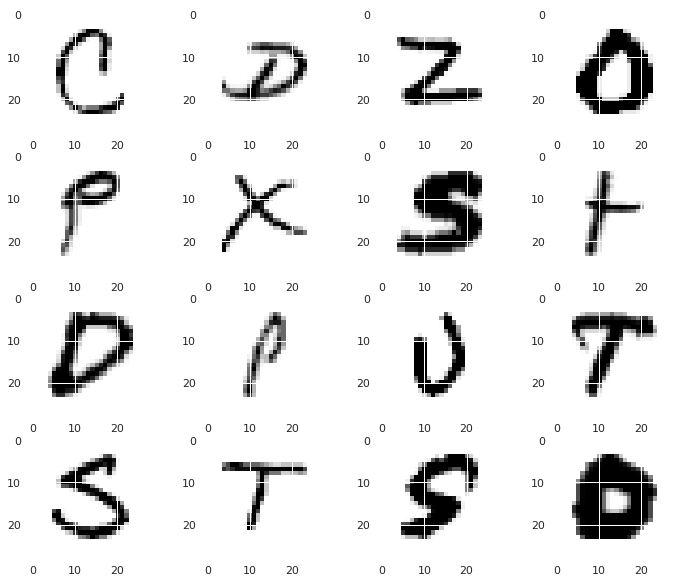

In [4]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X) #shuffle

plt.figure(figsize = (12,10)) #visualize
row, colums = 4, 4 #4*4 fig
for i in range(16):  
    plt.subplot(colums, row, i+1) #plt
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

## Data : Change labels

In [5]:
# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

## Data : split the data


In [6]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler() #최대/최소값이 각각 1, 0이 되도록 스케일링
standard_scaler.fit(X_train) #메서드와 트레이닝 데이터를 사용하여 변환 계수 추정

X_train = standard_scaler.transform(X_train) #메서드를 사용하여 실제 자료를 변환
X_test = standard_scaler.transform(X_test)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') #reshape
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train) #one hot encode
y_test = np_utils.to_categorical(y_test)

## Model : CNN

In [8]:
# Create Model
cls = Sequential() #Initializing the CNN

# 첫 번째 Convolution layer
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu')) #5*5 필터를 이용하여 28*28 영상의 특징을 추출한다. 결과물을 relu를 통해 다음 레이어에 전달한다. relu는 주로 은닉층에 사용!
cls.add(MaxPooling2D(pool_size=(2, 2))) #Max Pooling. 영상에서의 사소한 변화가 특징 추출에 큰 영향을 미치지 않게 한다.

# 드랍아웃
cls.add(Dropout(0.3)) # 과적합을 방지하기 위해서 학습 시에 지정된 비율만큼 임의의 입력 뉴런(1차원)을 제외시킵니다.

# Flattening
cls.add(Flatten()) # 2차원의 특징맵을 전결합층으로 전달하기 위해서 1차원 형식으로 바꿔줍니다.

# Full connection
cls.add(Dense(128, activation='relu')) # 모든 입력 뉴런과 출력 뉴런을 연결하는 전결합층입니다. 결과물을 relu를 통해 다음 레이어로 전달한다.  relu는 주로 은닉층에 사용!
cls.add(Dense(len(y.unique()), activation='softmax')) # 모든 입력 뉴런과 출력 뉴런을 연결하는 전결합층입니다. 결과물을 softmax를 통해 확률 값이 가장 높은 클래스로 분류한다. softmax는 주로 출력층에 이용한다!

# Compile model
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

# Final evaluation of the model
scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 279337 samples, validate on 93113 samples
Epoch 1/18
 - 16s - loss: 0.2378 - acc: 0.9342 - val_loss: 0.0879 - val_acc: 0.9770
Epoch 2/18
 - 14s - loss: 0.0887 - acc: 0.9750 - val_loss: 0.0722 - val_acc: 0.9800
Epoch 3/18
 - 13s - loss: 0.0669 - acc: 0.9809 - val_loss: 0.0557 - val_acc: 0.9849
Epoch 4/18
 - 13s - loss: 0.0544 - acc: 0.9839 - val_loss: 0.0494 - val_acc: 0.9866
Epoch 5/18
 - 14s - loss: 0.0458 - acc: 0.9865 - val_loss: 0.0474 - val_acc: 0.9872
Epoch 6/18
 - 14s - loss: 0.0389 - acc: 0.9883 - val_loss: 0.0438 - val_acc: 0.9883
Epoch 7/18
 - 14s - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0385 - val_acc: 0.9900
Epoch 8/18
 - 14s - loss: 0.0288 - acc: 0.9911 - val_loss: 0.0390 - val_acc: 0.9897
Epoch 9/18
 - 14s - loss: 0.0255 - acc: 0.

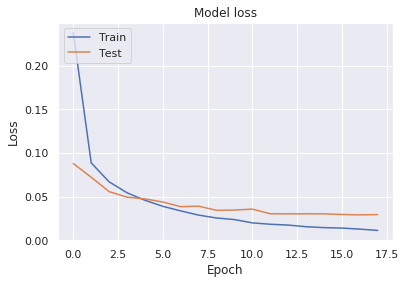

In [9]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()